In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [47]:
df = pd.read_csv('iris.csv')
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [16]:
print("HEAD : ",df.head)
print("ROW : ",df.shape[0])
print("ROW : ",df.shape[1])

HEAD :  <bound method NDFrame.head of         Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1.0            5.1           3.5            1.4           0.2   
1      2.0            4.9           3.0            1.4           0.2   
2      3.0            4.7           3.2            1.3           0.2   
3      4.0            4.6           3.1            1.5           0.2   
4      5.0            5.0           3.6            1.4           0.2   
..     ...            ...           ...            ...           ...   
147  146.0            6.7           3.0            5.2           2.3   
148  147.0            6.3           2.5            5.0           1.9   
149  148.0            6.5           3.0            5.2           2.0   
150  149.0            6.2           3.4            5.4           2.3   
151  150.0            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       I

<AxesSubplot:>

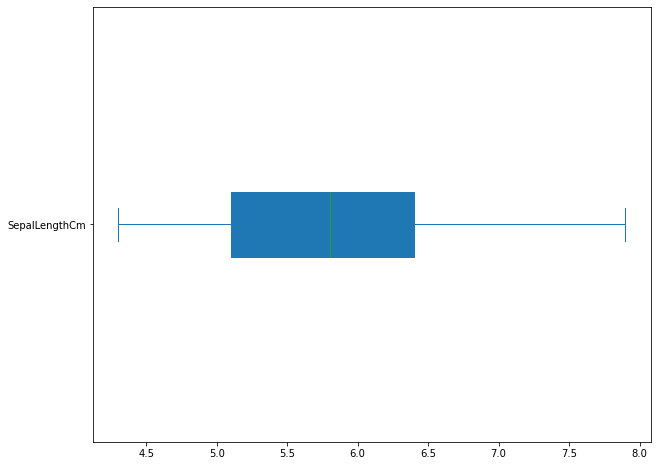

In [22]:
df["SepalLengthCm"].plot(kind='box', figsize=(10, 8), vert=False, patch_artist=True)


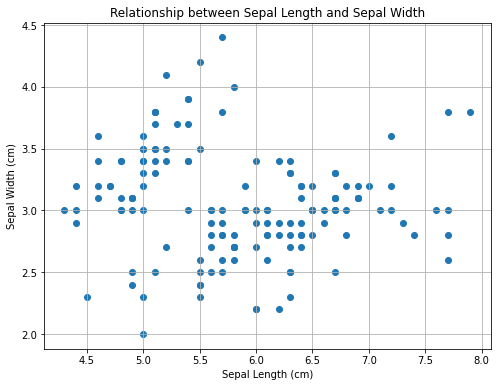

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('iris.csv')
plt.figure(figsize=(8, 6))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'])
plt.title('Relationship between Sepal Length and Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.grid(True)
plt.show()


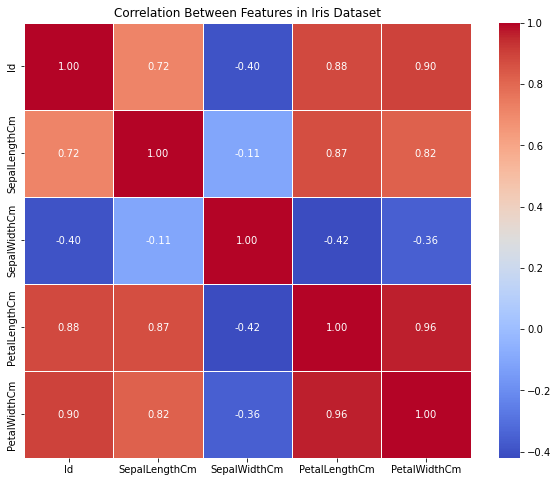

In [26]:

iris_df = pd.read_csv("iris.csv")
iris_df = iris_df.drop(columns="Species")
correlation_matrix = iris_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix ,annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Features in Iris Dataset')
plt.show()


In [48]:
print(type(df))
df = df.dropna()
x=df[["SepalLengthCm"]]
y=df[["SepalWidthCm"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print("Traing set - x shape : ",x_train.shape,"\nTraing set - y shape : ",y_train.shape,"\nTesting set - x shape : ",x_test.shape,"\nTesting set - y shape : ",y_test.shape)

<class 'pandas.core.frame.DataFrame'>
Traing set - x shape :  (105, 1) 
Traing set - y shape :  (105, 1) 
Testing set - x shape :  (45, 1) 
Testing set - y shape :  (45, 1)


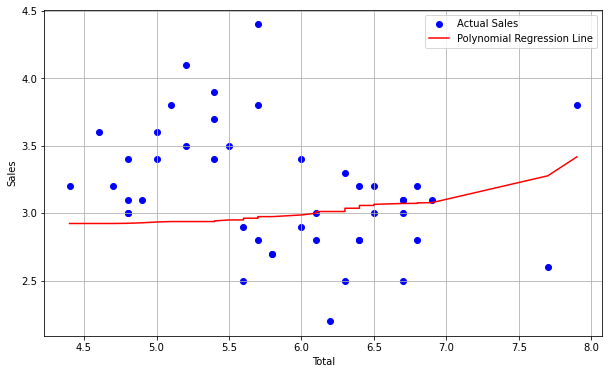


Mean Squared Error (MSE) [0.21707104000778113]

Root Mean Squared Error (RMSE) [0.46590883229209246]

Mean Absolute Error (MAE) [0.35515682577777785]

R-squared (R2) [-0.05528606140048198]


In [52]:
degree_error = {}
mse_val = []
rmse_val = []
coeff = []
mae_val = []
r2_val= []



poly_feature = PolynomialFeatures(degree = 3)
x_train_poly = poly_feature.fit_transform(x_train)
x_test_poly = poly_feature.transform(x_test)

model = LinearRegression()
model.fit(x_train_poly,y_train)

y_pred = model.predict(x_test_poly)
coeff.append(model.coef_)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mse_val.append(mse)
rmse_val.append(rmse)

mae = mean_absolute_error(y_test, y_pred)
mae_val.append(mae)

r2 = r2_score(y_test, y_pred)
r2_val.append(r2)

#degree_error[degree] = rmse 
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual Sales')
plt.plot(np.sort(x_test.values, axis=0), np.sort(y_pred, axis=0), color='red', label='Polynomial Regression Line')
#plt.title(f"Polynomial Regression Degree {degree}: Mean Squared Error = {rmse:.2f}")
plt.xlabel('Total')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()



print("\nMean Squared Error (MSE)",mse_val)
print("\nRoot Mean Squared Error (RMSE)",rmse_val)
print("\nMean Absolute Error (MAE)",mae_val)
print("\nR-squared (R2)",r2_val)